Petgraph demos series - Dijkstra find minimal path between nodes.

By Morpher

License: MIT

Written: 2025-11-27

In [2]:
:dep petgraph = "0.8.3"
:dep petgraph-evcxr = "*"
:dep hashbrown = "0.15"

In [3]:
extern crate petgraph;
use petgraph::graph::Graph;
use petgraph::dot::Dot;
use petgraph::algo::dijkstra;
use petgraph_evcxr::draw_graph;
use hashbrown::HashMap;

In [4]:
:dep plotters = { version = "^0.3.6", default-features = false, features = ["evcxr", "all_series", "all_elements"] }
extern crate plotters;
use plotters::prelude::*;

First we create undirected graph which holds name of the city as node weight and distance between cities as edge weight.

In [5]:

let mut graph: Graph<String, i32, petgraph::Undirected> = Graph::new_undirected();
let ingolstadt = graph.add_node("Ingolstadt".to_string());
let augsburg = graph.add_node("Augsburg".to_string());
let prague = graph.add_node("Prague".to_string());
let dresden = graph.add_node("Dresden".to_string());
let berlin = graph.add_node("Berlin".to_string());
let leipzig = graph.add_node("Leipzig".to_string());
let munich = graph.add_node("Munich".to_string());
let nuremberg = graph.add_node("Nuremberg".to_string());
let innsbruck = graph.add_node("Innsbruck".to_string());
let salzburg = graph.add_node("Salzburg".to_string());
let bolzano = graph.add_node("Bolzano".to_string());
let trento = graph.add_node("Trento".to_string());
let vienna = graph.add_node("Vienna".to_string());
let bratislava = graph.add_node("Bratislava".to_string());
let budapest = graph.add_node("Budapest".to_string());

Adding distances between cities in km.

In [6]:
graph.add_edge(munich, augsburg, 79);
graph.add_edge(ingolstadt, augsburg, 84);
graph.add_edge(ingolstadt, nuremberg, 105);
graph.add_edge(nuremberg, prague, 311);
graph.add_edge(dresden, prague, 148);
graph.add_edge(leipzig, dresden, 113);
graph.add_edge(leipzig, berlin, 190);
graph.add_edge(nuremberg, leipzig, 307);
graph.add_edge(nuremberg, munich, 206);
graph.add_edge(munich, innsbruck, 142);
graph.add_edge(munich, salzburg, 150);
graph.add_edge(innsbruck, salzburg, 189);
graph.add_edge(innsbruck, bolzano, 121);
graph.add_edge(bolzano, trento, 58);
graph.add_edge(salzburg, vienna, 296);
graph.add_edge(vienna,  bratislava, 80);
graph.add_edge(vienna, budapest, 290);
graph.add_edge(bratislava, budapest, 200);

path is Hashmap<NodeIndex, i32> keeps minimal distances to all other cities from Ingolstadt.

In [7]:
    let path = dijkstra(
        &graph, 
        ingolstadt, 
        Some(trento), 
        |w| *w.weight() as u32, 
    );

Perfect visualisation of our Graph

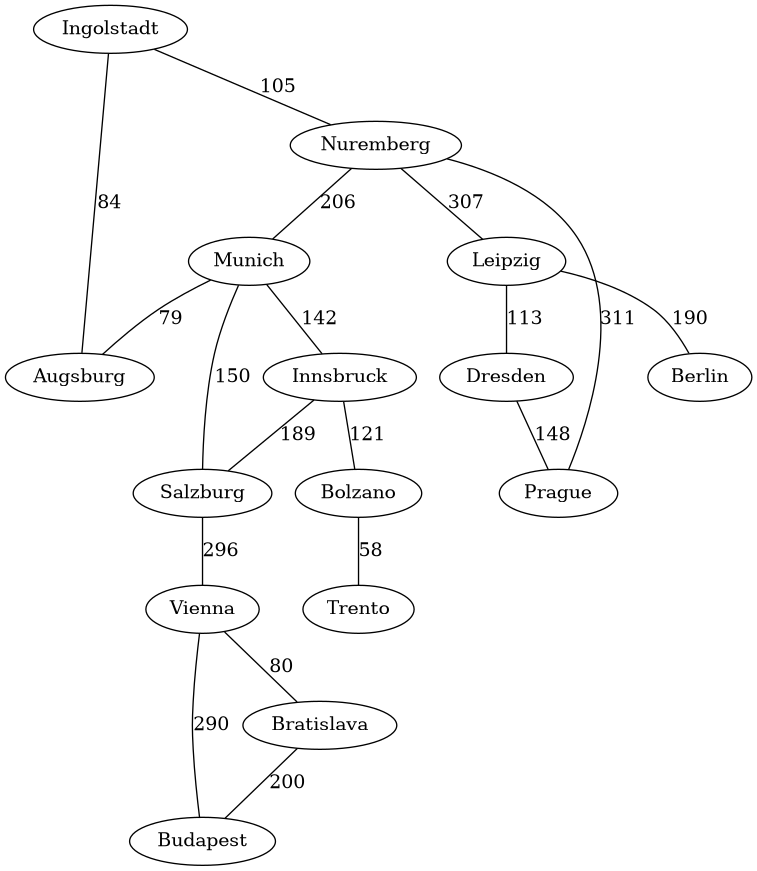

In [8]:
draw_graph(&graph);

In [9]:
path

{NodeIndex(3): 525, NodeIndex(5): 412, NodeIndex(8): 305, NodeIndex(12): 609, NodeIndex(0): 0, NodeIndex(10): 426, NodeIndex(4): 602, NodeIndex(7): 105, NodeIndex(1): 84, NodeIndex(6): 163, NodeIndex(11): 484, NodeIndex(9): 313, NodeIndex(2): 416}

In [10]:
path.iter().for_each(|n| {
    let city  = graph.node_weight(*n.0).unwrap();
    println!("{:?} : {} km", city, n.1);
})

"Dresden" : 525 km
"Leipzig" : 412 km
"Innsbruck" : 305 km
"Vienna" : 609 km
"Ingolstadt" : 0 km
"Bolzano" : 426 km
"Berlin" : 602 km
"Nuremberg" : 105 km
"Augsburg" : 84 km
"Munich" : 163 km
"Trento" : 484 km
"Salzburg" : 313 km
"Prague" : 416 km


()